#  **Rules & Regulations Used in the Analysis** 📜
#### - **Dataset Selection:** We use a publicly available dataset for analysis.
#### - **Data Exploration:** `.info()` function provides an overview of the dataset, including data types and missing values.
#### - **Correlation Analysis:** Pearson's correlation coefficient is used to measure linear relationships.
#### - **Data Visualization:** Heatmaps and scatter plots are used to understand feature relationships.
#### - **Outlier Removal:** The IQR method is used to detect and remove extreme values.
#### - **Data Transformation:** Log transformation is applied to normalize skewed data.
#### - **Inferential Statistics:** A two-tailed Z-test is used to compare sample and population means.
#### - **Confidence Intervals:** 95% confidence intervals are calculated to estimate population parameters.

# **Load the dataset** 🏠📊
# We use the 'house_prices' dataset from seaborn.


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target  # Add target variable (house prices)

In [2]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847



# **Display dataset information** ℹ️
# This function provides an overview of the dataset, including data types and missing values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


 # **Feature Descriptions** 🏡📊
*  **MedInc (Median Income):** The median income of households in a block group (in tens of thousands of dollars).
* **HouseAge (House Age):** The median age of houses in the block group.
* **AveRooms (Average Rooms per Household):** The average number of rooms per household in a block group.
* **AveBedrms (Average Bedrooms per Household):** The average number of bedrooms per household in a block group.
* **Population:** The total population of the block group.
* **AveOccup (Average Occupancy per Household):** The average number of people living in a household in a block group.
* **Latitude:** The latitude coordinate of the block group.
* **Price (Median House Value):** The median house value in a block group (in hundreds of thousands of dollars).





# **Compute Pearson's correlation matrix** 🔢📈
# Pearson's correlation coefficient measures the linear relationship between numerical features.
[Must read "https://www.geeksforgeeks.org/pearson-correlation-coefficient/"]

- Correlation coefficients are used to measure how strong a relationship is between two variables. There are different types of formulas to get a correlation coefficient, one of the most popular is Pearson’s correlation (also known as Pearson’s r) which is commonly used for linear regression.

- The Pearson Correlation Coefficient, denoted as r, is a statistical measure that calculates the strength and direction of the linear relationship between two variables on a scatterplot. The value of r ranges between -1 and 1, where:

        1: indcates perfect +ve linear relationship 

        0: indicates not linear relationship among the two variables

        -1: indicates perfect -ve linear relationship  
    

- Symmetry: The correlation coefficient is symmetric, meaning the correlation between variables X and Y is the same as the correlation between Y and X.
- Invariance: The correlation coefficient remains unchanged under linear transformations of the variables (e.g., multiplication by a constant or addition of a constant), making it invariant to changes in scale and location

> **It’s important to remember that correlation doesn’t imply causation – just because two variables are related, it doesn’t mean one causes the change in the other.**
>> It only measures the degree of linear association and does not establish a cause-and-effect relationship.

<table style="width: 90%; margin:auto;">
<thead>
<tr>
    <th>Pearson Correlation Coefficient (r) Rang</th>
    <th>Type of Correlation	</th>
    <th>Description of Relationship	</th>
    <th>New Illustrative Example</th>
</tr>
</thead>
<tbody> 
<tr>
<td> 0 < r ≤ 1</td>
<td> Positive</td>
<td> An increase in one variable associates with an increase in the other.	</td>
<td>Study Time vs. Test Scores: More hours spent studying tends to lead to higher test scores </td>
</tr>
<tr>
<td> r = 0</td>
<td> none</td>
<td>No discernible relationship between the changes in both variables. </td>
<td>Shoe Size vs. Reading Skill: A person’s shoe size doesn’t predict their ability to read. </td>
</tr>
<tr>
<td> -1 ≤ r < 0 </td>
<td> Negative </td>
<td> An increase in one variable associates with a decrease in the other.	</td>
<td>Outdoor Temperature vs. Home Heating Cost: As the outdoor temperature decreases, heating costs in the home increase. </td>
</tr>
</tbody> 
</table>


<table style="width: 70%; margin:auto;" >
    <thead>
        <tr>
            <th >Pearson correlation coefficient (r) value</th>
            <th >Strength</th>
            <th >Direction</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td >Greater than .5</td>
            <td >Strong</td>
            <td >Positive</td>
        </tr>
        <tr>
            <td >Between .3 and .5</td>
            <td >Moderate</td>
            <td >Positive</td>
        </tr>
        <tr>
            <td >Between 0 and .3</td>
            <td >Weak</td>
            <td >Positive</td>
        </tr>
        <tr>
            <td >0</td>
            <td >None</td>
            <td >None</td>
        </tr>
        <tr>
            <td >Between 0 and –.3</td>
            <td >Weak</td>
            <td >Negative</td>
        </tr>
        <tr>
            <td >Between –.3 and –.5</td>
            <td >Moderate</td>
            <td >Negative</td>
        </tr>
        <tr>
            <td >Less than –.5</td>
            <td >Strong</td>
            <td >Negative</td>
        </tr>
    </tbody>
</table>

In [14]:
correlation_matrix = df.corr()
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000



# **Draw heatmap of correlations** 🌡️🎨
# This heatmap visualizes the relationships between features. Darker colors indicate stronger correlations.

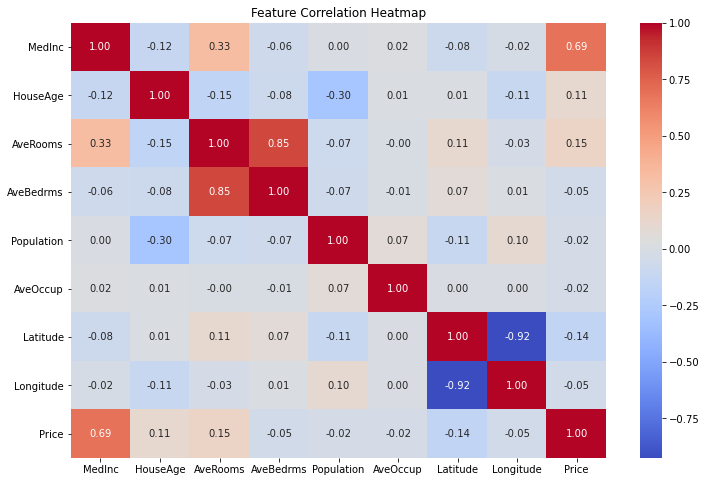

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

<Axes: >

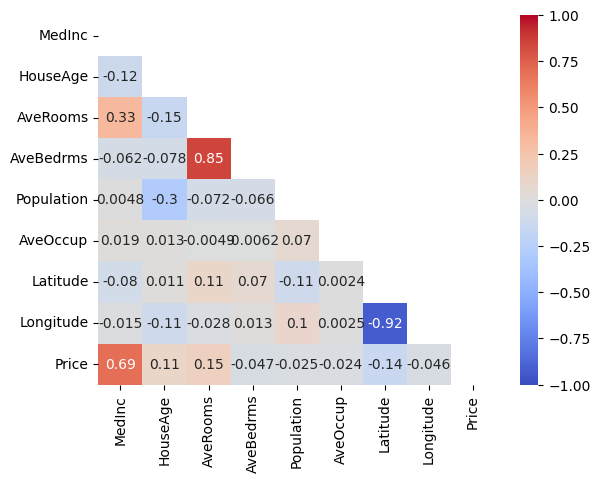

In [12]:
import seaborn as sns
import numpy as np

# removing redunduncies!
matrix = df.corr()
mat_mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix,annot=True ,vmin= -1, vmax=1 ,center=0, cmap="coolwarm" , mask=mat_mask)

# **Selecting two features for linear relationship plot** 📏🏡
# We choose 'sqft_living' (square footage of living area) and 'price' (house price) to analyze their relationship.

# **Scatter plot with regression line** 📊📉
# This plot visualizes the linear relationship between the two chosen features.

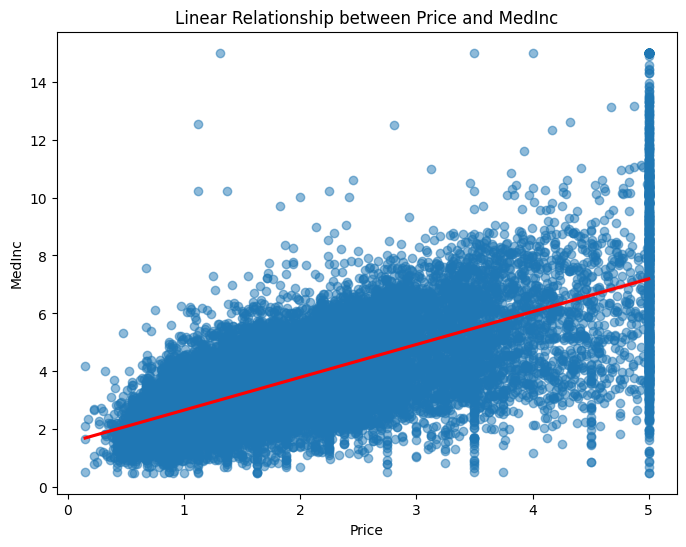

In [16]:
feature_x = "Price"
feature_y = "MedInc"
plt.figure(figsize=(8, 6))
sns.regplot(x=df[feature_x], y=df[feature_y], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Price')
plt.ylabel(feature_y)
plt.title(f'Linear Relationship between {feature_x} and {feature_y}')
plt.show()


# **Plot feature distribution and calculate statistics** 📊📏
# We select 'MedInc' (median income) to visualize its distribution and compute standard deviation & variance.

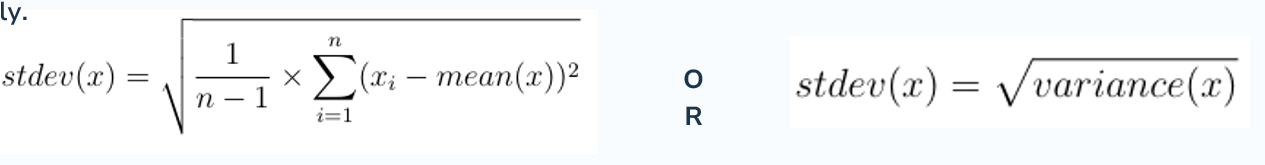

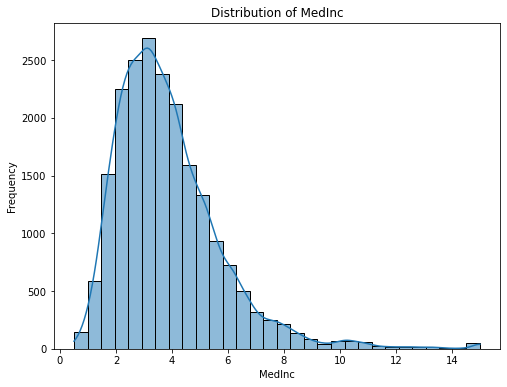

Standard Deviation of MedInc: 1.8998217179452732
Variance of MedInc: 3.609322559976529


In [28]:
feature = 'MedInc'
plt.figure(figsize=(8, 6))
sns.histplot(df[feature], bins=30, kde=True)
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.title(f'Distribution of {feature}')
plt.show()

std_dev = df['MedInc'].std()
variance = df['MedInc'].var()

print(f'Standard Deviation of {feature}: {std_dev}')
print(f'Variance of {feature}: {variance}')

# **Plot feature distribution after outlier removal and log transformation** 📊📏
# We select 'MedInc' (median income) to visualize its distribution and compute standard deviation & variance.

In [29]:
feature = 'MedInc'
# Remove outliers (values beyond 1.5*IQR)
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

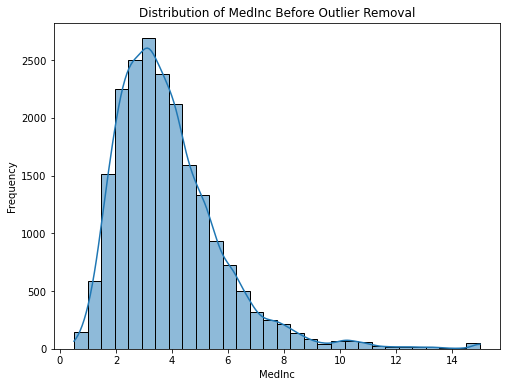

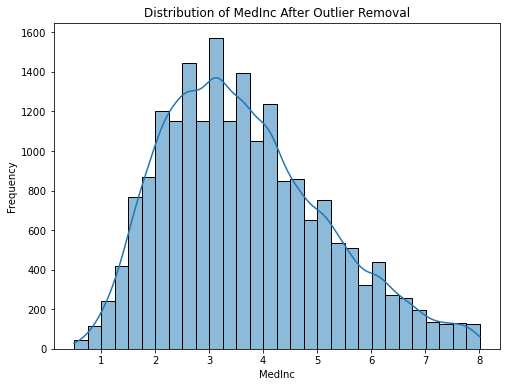

In [30]:
# Plot distribution before outlier removal
plt.figure(figsize=(8, 6))
sns.histplot(df[feature], bins=30, kde=True)
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.title(f'Distribution of {feature} Before Outlier Removal')
plt.show()

# Plot distribution after outlier removal
plt.figure(figsize=(8, 6))
sns.histplot(df_filtered[feature], bins=30, kde=True)
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.title(f'Distribution of {feature} After Outlier Removal')
plt.show()

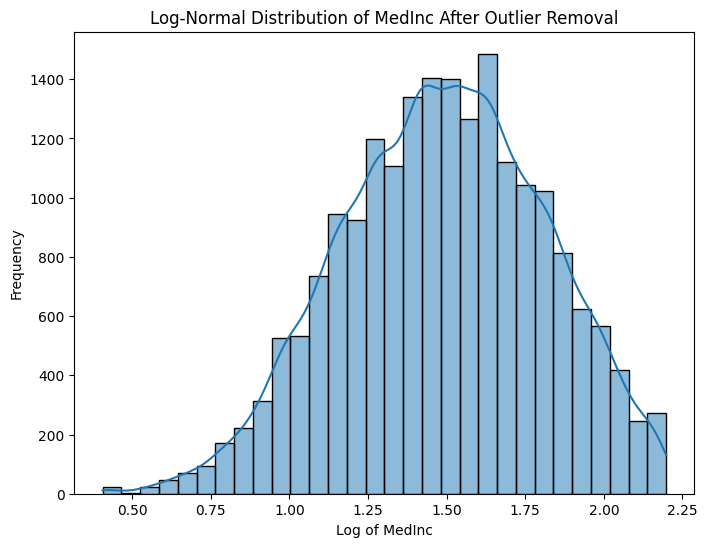

Standard Deviation of log-transformed MedInc: 0.3239071267750676
Variance of log-transformed MedInc: 0.10491582677567973


In [22]:
# Apply log transformation
log_feature = np.log1p(df_filtered[feature])

plt.figure(figsize=(8, 6))
sns.histplot(log_feature, bins=30, kde=True)
plt.xlabel(f'Log of {feature}')
plt.ylabel('Frequency')
plt.title(f'Log-Normal Distribution of {feature} After Outlier Removal')
plt.show()

std_dev = log_feature.std()
variance = log_feature.var()

print(f'Standard Deviation of log-transformed {feature}: {std_dev}')
print(f'Variance of log-transformed {feature}: {variance}')

# **Inferential Statistics: Hypothesis Testing & Confidence Interval** 📊📉
# 1. **Take a random sample from the dataset** 🎲

In [33]:
df.shape

(20640, 9)

In [34]:
sample_size = 500 #100K
sample = df.sample(n=sample_size, random_state=42)

# 2. **Check if the sample represents the population** 📏

In [39]:
sample_mean = sample['MedInc'].mean()
population_mean = df['MedInc'].mean()
population_std = df['MedInc'].std()
print(f'Sample Mean: {sample_mean}, Population Mean: {population_mean}')

Sample Mean: 3.905138599999999, Population Mean: 3.8706710029070246


In [40]:
sample_std

2.090341624650271

In [41]:
population_std

1.8998217179452732

# 3. **Hypothesis Testing: Two-Tailed One-Sample Z-Test** 🧪


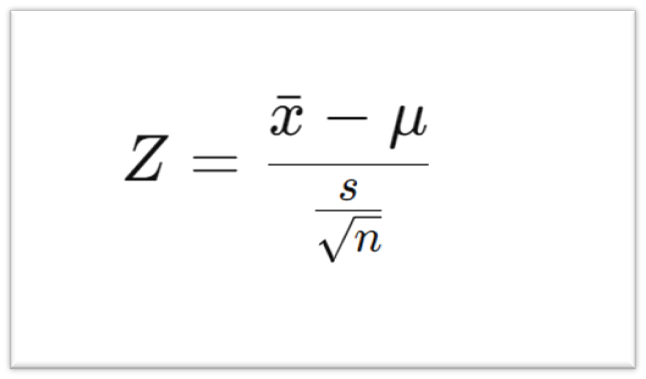

In [33]:
from scipy.stats import norm  # Explicitly import norm for Z-test
z_stat = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
z_critical = norm.ppf(0.975)  # Two-tailed test at 95% confidence level
print(f'Z-Statistic: {z_stat}, Z-Critical: ±{z_critical}')
if abs(z_stat) > z_critical:
    print("The sample mean is significantly different from the population mean (reject H0).")
else:
    print("No significant difference between the sample and population mean (fail to reject H0).")

Z-Statistic: 0.40567959294849654, Z-Critical: ±1.959963984540054
No significant difference between the sample and population mean (fail to reject H0).


# 4. **Confidence Interval Calculation** 📊

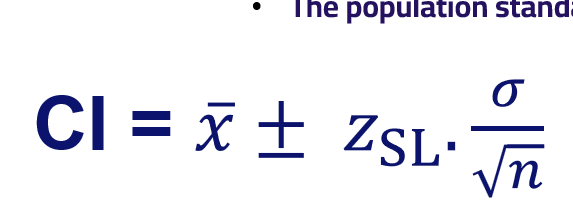

In [34]:
margin_error = z_critical * (population_std / np.sqrt(sample_size))
confidence_interval = (sample_mean - margin_error, sample_mean + margin_error)
print(f'95% Confidence Interval for Median Income: {confidence_interval}')


95% Confidence Interval for Median Income: (3.7386149441144045, 4.071662255885596)



# 5. **Heatmap for Sample Features** 🔥


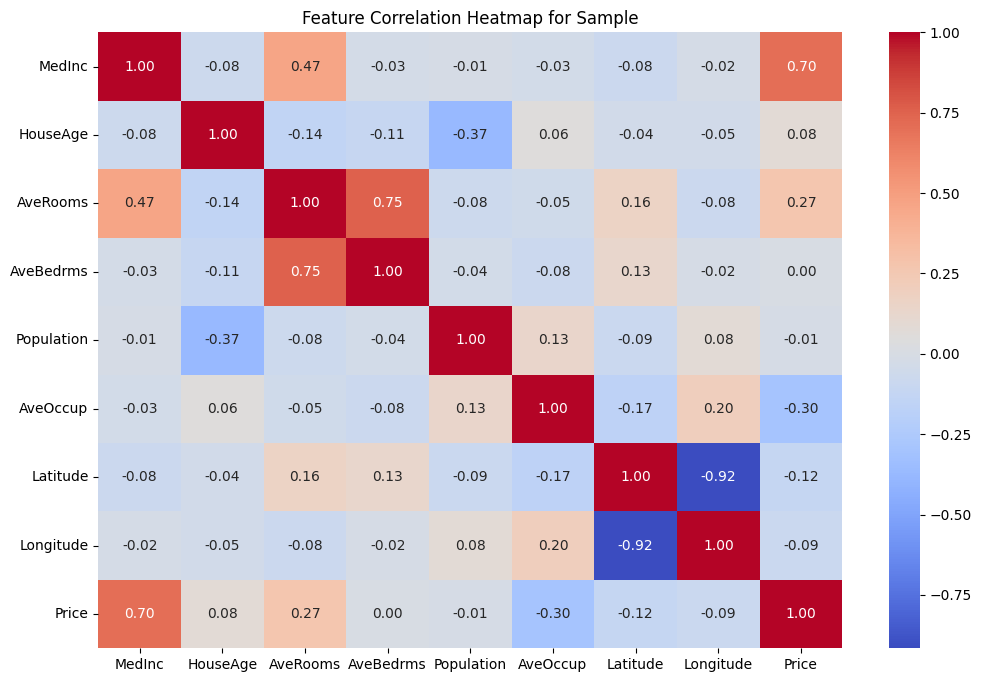

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(sample.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap for Sample')
plt.show()

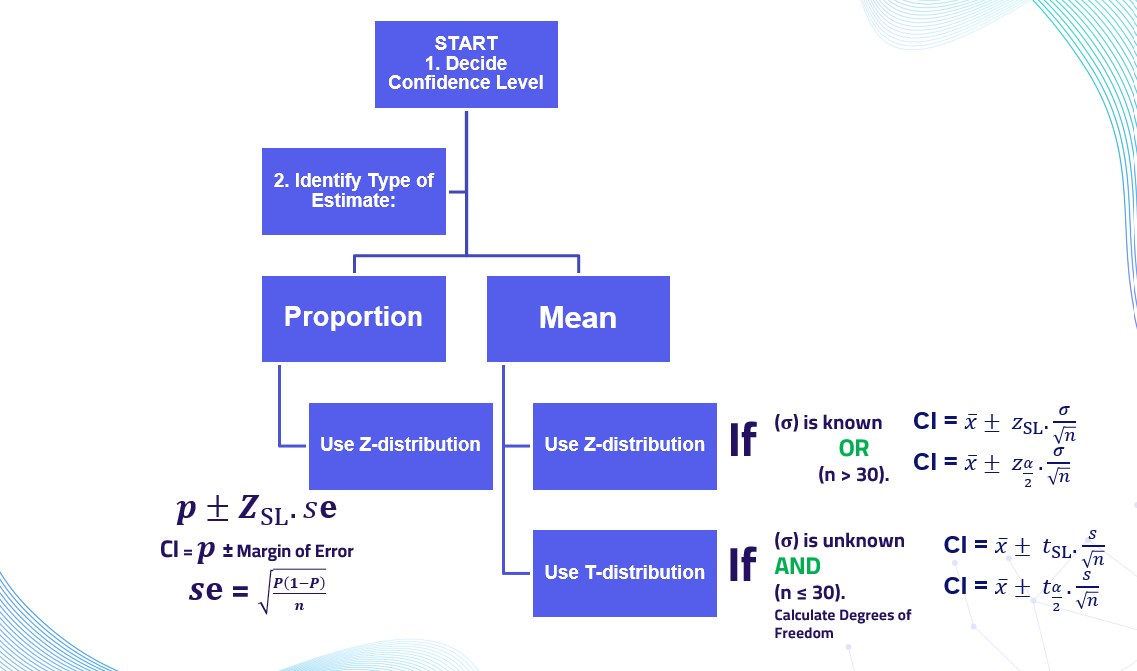